<a href="https://colab.research.google.com/github/lha2326/File/blob/main/Copy_of_Flight_Price_Prediction_(D%E1%BB%B1_%C4%91o%C3%A1n_gi%C3%A1_v%C3%A9_m%C3%A1y_bay)_Oanhck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Các nhóm sẽ thuyết trình báo cáo kết quả của bài tập 2 dự kiến vào buổi học ngày 24.6.2023. Mỗi nhóm có 15 phút để trình bày và 5 phút trả lời câu hỏi.

Đề bài: Lựa chọn một trong các chủ đề có thể giải quyết thông qua mô hình hồi quy tuyến tính trên kaggle. Tối đa 3 nhóm được chọn cùng 1 chủ đề. Các nhóm để lại link chủ đề mình chọn trong comment theo tinh thần chọn trước được trước, chọn sau thì phải căn cứ vào đề tài của các nhóm trước. Đăng kí cần ghi rõ số nhóm.

Nếu 2 hay 3 nhóm chọn cùng 1 chủ đề thì phải phối hợp với nhau đoạn xử lý dữ liệu đầu vào để cuối cùng đưa về cùng 1 bài toán tối ưu hóa (linear regression) nhằm đảm bảo kết quả bài toán tối ưu hóa so sánh được với nhau. Phần lập trình thử nghiệm thuật toán tối ưu hóa các nhóm cần làm độc lập.

Các nhóm cần tự lập trình các thuật toán giảm gradient, accelerated gradient descent và Newton cho bài toán với độ dài bước cố định và độ dài bước theo backtracking.
Cần thử nghiệm với nhiều con số khác nhau.
Cần vẽ biểu đồ so sánh kết quả của các thử nghiệm này và đưa ra kết luận về setup nên lựa chọn tương tự như ở đây https://www.researchgate.net/figure/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron_fig1_352322277. Trong đó trục tung là độ lớn hàm mục tiêu còn trục hoành là iterations và thời gian (vẽ 2 hình khác nhau).
Đồng thời học viên cần so sánh về kết quả hàm mục tiêu và thời gian tính toán của code của mình với chế độ mặc định khi sử dụng thư viện sklearn (lưu ý là cần so sánh hàm mục tiêu của bài toán tối ưu hóa chứ không phải độ chính xác, các nhóm vẫn có thể so sánh thêm độ chính xác nếu muốn).

Các nhóm cần nộp slide và code tại bài tập này.

Lưu ý:
Mọi thành viên trong nhóm phải nắm được kết quả nhóm thuyết trình, ai cũng có thể trình bày được bất cứ nội dung nào.
Mục tiêu chủ yếu là phần tối ưu hóa, nên không nhất thiết phải quá tập trung vào phần xử lý và hiệu chỉnh dữ liệu hay feature engineering.
Các yêu cầu nêu ra cần phải được thực hiện, đặc biết yêu cầu các nhóm chọn chung chủ đề phải phối hợp trong việc xử lý dữ liệu và yêu cầu so sánh với thư viện sklearn. Nếu nhóm nào không thực hiện 1 trong 2 yêu cầu này thì bài thuyết trình sẽ được đánh giá là không đạt yêu cầu.
Yêu cầu về bài toán lựa chọn:
-  Phải có số features lớn hơn hoặc bằng 5.
Phải có số điểm dữ liệu >= 100
Một số ví dụ về nội dung có thể lựa chọn
Dự đoán giá xe https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
Dự đoán giá nhà https://www.kaggle.com/datasets/swathiachath/kc-housesales-data
Dự đoán giá nhà https://www.kaggle.com/datasets/shibumohapatra/house-price
Dự đoán giá xe https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices
Có thể tìm thêm tại link https://www.kaggle.com/datasets?search=Linear+regression

# I. Khảo sát và tiền xử lý dữ liệu

## **1. Giới thiệu**


Bộ dữ liệu **"Flight Price Prediction"** được lấy từ [Kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?resource=download)
. Dữ liệu gồm 300,153 dòng tương ứng với mỗi lượt đặt vé. Trong đó, có 1 cột STT và 11 biến thông tin về vé máy bay.

1.   Hãng hàng không (airline)
2.   Mã chuyến bay (flight)
3.   Thành phố khởi hành (source city)
4.   Thời gian khởi hành (departure time)
5.   Số lượt trung chuyển (stops)
6.   Thời gian đến (arrival time)
7.   Thành phố đến (destination city)
8.   Hạng vé (class): Hạng thường - Economy và hạng thương gia - Business
9.   Thời gian bay (duration)
10.  Số ngày còn lại (days left): Ngày đặt vé - Ngày khởi hành của chuyến bay
11.  Giá vé (price).


## **2. Khảo sát dữ liệu**


Bên dưới ta sẽ kiểm tra số trường và kích thước mẫu

### Import thư viện


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Tổng quan dữ liệu

In [ ]:
# Import Data
link = 'https://raw.githubusercontent.com/Pegah-Ardehkhani/Flight-Price-EDA-and-Prediction/main/data/Clean_Dataset.csv'
df = pd.read_csv(link,encoding= 'unicode_escape')

In [ ]:
# Đọc 5 dòng đầu tiên
print('Data shape: ', df.shape)
df.head()

Data shape:  (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# Kiểm tra dạng dữ liệu
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
Unnamed: 0,int64
days_left,int64
price,int64
duration,float64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object


In [ ]:
table_dtype['Data Type'].value_counts()

object     8
int64      3
float64    1
Name: Data Type, dtype: int64

In [ ]:
# Kiểm tra dữ liệu null
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
# Thống kê số lượng các class trong mỗi nhóm đối với dữ liệu dạng object.
df.select_dtypes('object').apply(pd.Series.nunique)

airline                6
flight              1561
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
dtype: int64

### Biểu đồ phân phối

Vẽ biểu đồ phân phối số lượng các quan sát theo nhóm đối với dữ liệu dạng object. Đối với các biến **flight** ta sẽ nghiên cứu riêng do số lượng class lớn.

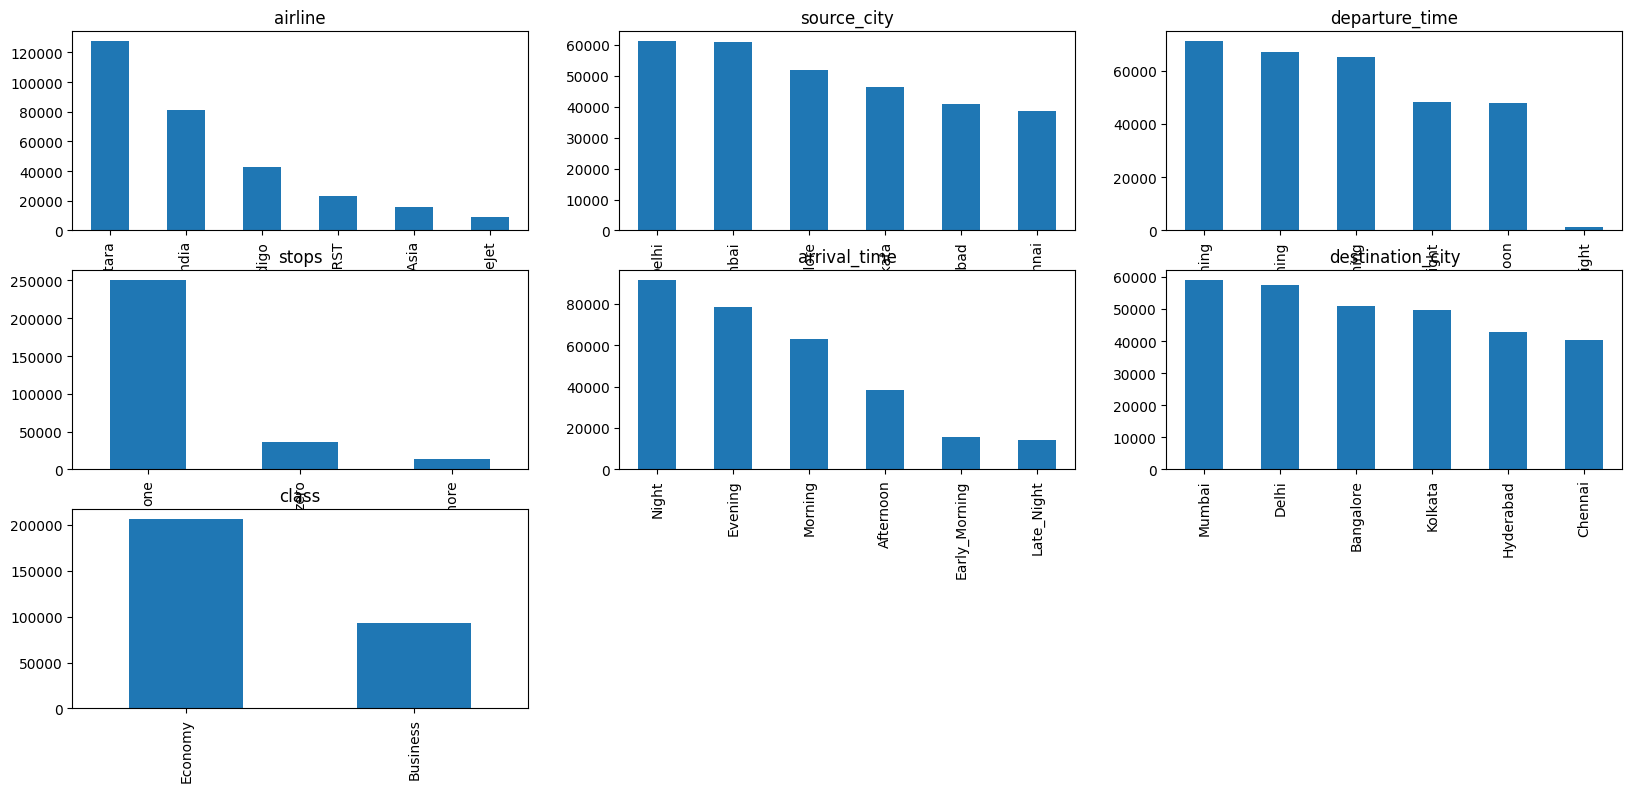

In [ ]:
# Biểu đồ phân phối
dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['flight']]


def _plot_bar_classes(cols):
    df[cols].value_counts().plot.bar()

plt.figure(figsize = (20, 15))
for i in range(1, 8, 1):
    plt.subplot(5, 3, i)
    _plot_bar_classes(dtypes_object[i-1])
    plt.title(dtypes_object[i-1])

Kiểm tra riêng biến flight

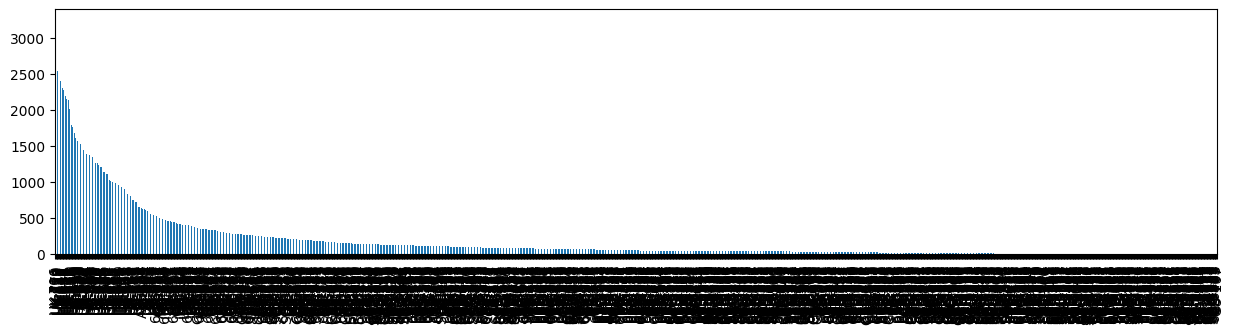

In [ ]:
plt.figure(figsize = (15, 7))
i = 0
for col in ['flight']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_bar_classes(col)

Thông qua biểu đồ ta cũng hình dung được một vài biến phân loại có sự khác biệt lớn về giá như airline, stops, class. Do vậy, đây là những biến có tác động lớn đến biến mục tiêu.

In [ ]:
df.groupby('airline').size()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
dtype: int64

In [ ]:
df.groupby('flight').size()

flight
6E-102      39
6E-105       5
6E-113      49
6E-121      20
6E-123       5
          ... 
UK-988    1381
UK-993     911
UK-994    1273
UK-995    1024
UK-996    1266
Length: 1561, dtype: int64

In [ ]:
df.groupby('source_city').size()

source_city
Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
dtype: int64

In [ ]:
df.groupby('departure_time').size()

departure_time
Afternoon        47794
Early_Morning    66790
Evening          65102
Late_Night        1306
Morning          71146
Night            48015
dtype: int64

In [ ]:
df.groupby('stops').size()

stops
one            250863
two_or_more     13286
zero            36004
dtype: int64

In [ ]:
df.groupby('arrival_time').size()

arrival_time
Afternoon        38139
Early_Morning    15417
Evening          78323
Late_Night       14001
Morning          62735
Night            91538
dtype: int64

In [ ]:
df.groupby('destination_city').size()

destination_city
Bangalore    51068
Chennai      40368
Delhi        57360
Hyderabad    42726
Kolkata      49534
Mumbai       59097
dtype: int64

In [ ]:
df.groupby('class').size()

class
Business     93487
Economy     206666
dtype: int64

In [ ]:
df.groupby('duration').size()

duration
0.83      52
0.92      78
1.00     377
1.08     553
1.17     960
        ... 
44.50      1
45.83      3
47.08      1
47.75      2
49.83      2
Length: 476, dtype: int64

In [ ]:
df.groupby('days_left').size()

days_left
1     1927
2     4026
3     4248
4     5077
5     5392
6     5740
7     5703
8     5767
9     5665
10    5822
11    6417
12    6381
13    6404
14    6349
15    6340
16    6272
17    6419
18    6602
19    6537
20    6502
21    6479
22    6494
23    6401
24    6542
25    6633
26    6573
27    6360
28    6522
29    6397
30    6501
31    6534
32    6585
33    6532
34    6412
35    6291
36    6490
37    6476
38    6512
39    6593
40    6531
41    6525
42    6497
43    6472
44    6436
45    6314
46    6160
47    6069
48    6078
49    6154
dtype: int64

In [ ]:
df.groupby('price').size()

price
1105      300
1106        7
1443      180
1444       14
1526       20
         ... 
114705      1
115211      1
116562      1
117307      1
123071      1
Length: 12157, dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Nhận xét

Dữ liệu có tất cả 12 cột trong đó:
* **Unnamed: 0**: Cột thứ tự
* **airline**: Tên của các hãng hàng không. Đây là cột gồm các biến category với 6 hãng hàng không khác nhau.
* **flight**: Các mã chuyến bay. Đây là biến category.
* **source_city**: Các thành phố xuất phát. Đây là cột gồm các biến category với 6 thành phố khác nhau.
* **departure_time**: Thời gian khởi hành chuyến bay, được chia thành 6 khung giờ riêng biệt.
* **stops**: Số lượng điểm dừng ở mỗi chuyến bay. Đây là cột gồm các biến category.
* **arrival_time**: Thời gian chuyến bay hạ cánh, được chia thành 6 khung giờ riêng biệt.
* **destination_city**: Các thành phố đáp chuyến bay. Đây là cột gồm các biến category với 6 thành phố khác nhau.
* **class**: Hạng ghế, với hai giá trị "thường (Economy)" và "thương gia" (Business).
* **duration**: Thời lượng của chuyến bay. Đây là biến liên tục, với giá trị nhỏ nhất bằng 0.83 giờ và giấ trị lớn nhất là 49.83 giờ.
* **days_left**: Số ngày từ khi đặt vé tới lúc khởi hành chuyến bay, với giá trị nhỏ nhất là 1 ngày và giá trị lớn nhất là 49 ngày.
* **price**: Giá vé, với giá trị nhỏ nhất là 1,105 và giá trị lớn nhất là 123,071.

## **3. Tiền xử lý dữ liệu**

### Loại bỏ những biến không có ý nghĩa trong mô hình

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df1 = df.copy()

In [ ]:
# Loại bỏ cột flight, Unnamed do không có ý nghĩa thống kê
df1 = df1.drop(['flight','Unnamed: 0'], axis = 1)

In [ ]:
# Chuyển đổi các nhãn trong một DataFrame thành dạng số
le=LabelEncoder()
for col in df1.columns:
    if df1[col].dtype=='object':
        df1[col]=le.fit_transform(df1[col])

In [ ]:
# Lưu trữ tên cột và chỉ số dòng của DataFrame gốc
names = df1.columns
indexes = df1.index

# Áp dụng MinMaxScaler cho các biến đầu vào (không bao gồm biến mục tiêu)
scaler = MinMaxScaler(feature_range=(0, 1))
df1_scaled = scaler.fit_transform(df1.iloc[:, :-1])  # Chỉ lấy các cột trừ biến mục tiêu

# Tạo DataFrame mới từ dữ liệu đã được scaler và sử dụng lại tên cột và chỉ số dòng
data_scaled = pd.DataFrame(df1_scaled, columns=names[:-1], index=indexes)

# Ghép cột biến mục tiêu vào DataFrame đã được scaler
data_scaled[df1.columns[-1]] = df1.iloc[:, -1]

data_scaled.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0,5953
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0,5953
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0,5956
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0,5955
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0,5955


### Đánh giá mức độ tương quan


Mức độ tương quan của các biến sẽ được xếp hạng một cách tương đối dựa trên giá trị tuyệt đối của chúng. Các khoảng đánh giá như sau:

*   0-0.19: Rất yếu.
*   0.2-0.39: Yếu.
*   0.4-0.59: Trung bình.
*   0.6-0.79: Cao.
*   0.8-1: Rất cao.


Dựa trên bảng hệ số tương quan chúng ta có thể tìm ra những biến có mối liên hệ lớn tới biến giá vé máy bay


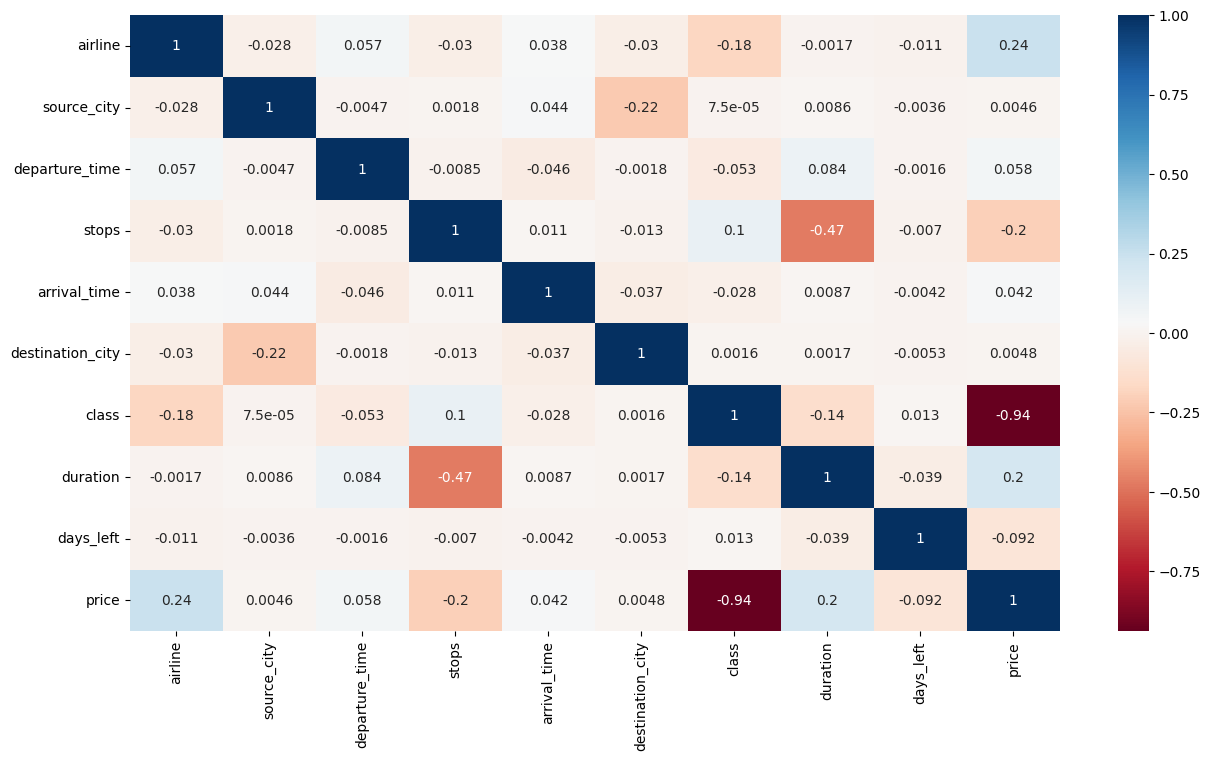

In [ ]:
# Đánh giá mức độ tương quan
plt.figure(figsize=(15,8))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

In [ ]:
# Tương quan với giá biến mục tiêu
cor_target = abs(cor["price"])
relevant_features = cor_target
relevant_features = relevant_features.sort_values(ascending=False)
relevant_features

price               1.000000
class               0.937860
airline             0.243358
duration            0.204222
stops               0.202620
days_left           0.091949
departure_time      0.058319
arrival_time        0.042043
destination_city    0.004795
source_city         0.004594
Name: price, dtype: float64

Như vậy, theo hệ số tương quan Pearson, những feature có ảnh hưởng tới giá tiền (price) là class, airline, duration và stops.

### Sử dụng KBest Features

In [ ]:
# Đặt 'price' làm biến mục tiêu
y = data_scaled['price']

# Các biến đầu vào
X_data = data_scaled.drop(['price'], axis=1)
selector = SelectKBest(f_classif, k=5)
X_important = selector.fit_transform(X_data, y)

# Chỉ số Index
index = selector.get_support()

# Tạo danh sách các biến
important_feature_names = X_data.columns[index]

print(important_feature_names)

Index(['airline', 'source_city', 'stops', 'destination_city', 'class'], dtype='object')


Sử dụng kBest Features, những feature có ảnh hưởng tới giá tiền (price) là airline, source_city, stops, destination_city và class.

In [ ]:
features = data_scaled.iloc[:, 0:9]
features

# features = data_scaled[['airline', 'source_city', 'stops', 'destination_city', 'class', 'duration', 'departure_time', 'arrival_time', 'days_left']]
# features

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...
300148,1.0,0.2,0.8,0.0,0.4,0.6,0.0,0.188776,1.0
300149,1.0,0.2,0.0,0.0,1.0,0.6,0.0,0.195714,1.0
300150,1.0,0.2,0.2,0.0,1.0,0.6,0.0,0.265306,1.0
300151,1.0,0.2,0.2,0.0,0.4,0.6,0.0,0.187143,1.0


### Chia tập train và test

In [ ]:
# Chuyển đổi features thành mảng NumPy
X = np.array(features)
X

array([[0.8       , 0.4       , 0.4       , ..., 1.        , 0.02734694,
        0.        ],
       [0.8       , 0.4       , 0.2       , ..., 1.        , 0.03061224,
        0.        ],
       [0.        , 0.4       , 0.2       , ..., 1.        , 0.02734694,
        0.        ],
       ...,
       [1.        , 0.2       , 0.2       , ..., 0.        , 0.26530612,
        1.        ],
       [1.        , 0.2       , 0.2       , ..., 0.        , 0.18714286,
        1.        ],
       [1.        , 0.2       , 0.8       , ..., 0.        , 0.18877551,
        1.        ]])

In [ ]:
# Chuyển đổi biến mục tiêu thành mảng NumPy
y = np.array(data_scaled['price'])
y

array([ 5953,  5953,  5956, ..., 79099, 81585, 81585])

In [ ]:
# Chia tập train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225114, 9), (75039, 9), (225114,), (75039,))

# **II. Lập trình thử nghiệm thuật toán tối ưu hóa**

Các nhóm cần tự lập trình các thuật toán giảm gradient, accelerated gradient descent và Newton cho bài toán với độ dài bước cố định và độ dài bước theo backtracking.
Cần thử nghiệm với nhiều con số khác nhau.
Cần vẽ biểu đồ so sánh kết quả của các thử nghiệm này và đưa ra kết luận về setup nên lựa chọn tương tự như ở đây https://www.researchgate.net/figure/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron_fig1_352322277. Trong đó trục tung là độ lớn hàm mục tiêu còn trục hoành là iterations và thời gian (vẽ 2 hình khác nhau).

Đồng thời học viên cần so sánh về kết quả hàm mục tiêu và thời gian tính toán của code của mình với chế độ mặc định khi sử dụng thư viện sklearn (lưu ý là cần so sánh hàm mục tiêu của bài toán tối ưu hóa chứ không phải độ chính xác, các nhóm vẫn có thể so sánh thêm độ chính xác nếu muốn).

## **1. Tổng quan**

Hàm tuyến tính với biến phản hồi là giá vé máy bay có dạng như sau:

$$y = \theta_0 + \theta_1.x_1 + ... + \theta_m.x_m $$


> Với
*  $X$ là ma trận có kích thước $(m \times n)$
*  $\theta$ là ma trận hệ số có kích thước $(n+1 \times 1)$


###1.1. Thêm số 1 cột 1 vào ma trận $X_{(m \times n)}$



$$X_{(m \times n)} \to
  \left[
    \begin{array}{0}
      {1}      && x_1^1  && x_2^1  && \cdots && x_n^1 \\
      {1}      && x_1^2  && x_2^2  && \cdots && x_n^2 \\
      \vdots   && \vdots  && \vdots && \ddots && \vdots  \\
      {1}      && x_1^m  && x_2^m  && \cdots && x_n^m \\
    \end{array}
  \right]_{m \,\times \, n+1}
  $$

> Với: $x_i^j$ là mẫu thứ i, biến thứ j

### 1.2. Ma trận hệ số $\theta_{(n+1 \, \times \, 1)}$




Ma trận $\theta$ sẽ dự đoán hoặc sinh ngẫu nhiên có dang như sau:

$$\theta_{(n+1 \, \times \,1)} =
  \left[
    \begin{array}{0}
      {\theta_0}      \\
      {\theta_1}      \\
      \vdots          \\
      {\theta_n}      \\
    \end{array}
  \right]_{n+1 \, \times \, 1}
  $$

### 1.3. Giá trị dự đoán


Sau khi có $X$ và $\theta$, ta có thể dự đoán giá trị giá vé máy bay $\hat{y}$:

$$\hat{y} = \theta_0 \times 1 \, + \sum \theta_jX_j^i$$
Với: i = 1, 2,...m; j = 1, 2, ...n


$$  \left[
    \begin{array}{0}
      {\hat{y}^1}      \\
      {\hat{y}^2}      \\
      \vdots       \\
      {\hat{y}^n}      \\
    \end{array}
  \right]_{m \, \times \, 1}
   =
  \left[
    \begin{array}{0}
      {1}      && x_1^1  && x_2^1  && \cdots && x_n^1 \\
      {1}      && x_1^2  && x_2^2  && \cdots && x_n^2 \\
      \vdots   && \vdots  && \vdots && \ddots && \vdots  \\
      {1}      && x_1^m  && x_2^m  && \cdots && x_n^m \\
    \end{array}
  \right]_{m \,\times \, n+1} .
  \left[
    \begin{array}{0}
      {\theta_0}      \\
      {\theta_1}      \\
      \vdots          \\
      {\theta_n}      \\
    \end{array}
  \right]_{n+1 \, \times \, 1}
  $$


### 1.4. Sai số dự đoán và hàm mất mát

**Sai số dự đoán**

Sau khi xây dựng được mô hình dự đoán đầu ra, ta cần 1 phép đánh giá phù hợp vơi bài toán. Với bài toán hồi quy nói chung, ta mong muốn sự sai khác đầu thự sự y và đầu ra dự đoán $\hat{y}$ là nhỏ nhất

$$e = error_{(m \times 1)} = y_{(m \times 1)} - \hat{y}_{(m \times 1)} $$


Ở đây, bình phương được lấy vì e có thể là số âm. Việc sai số là nhỏ nhất có thể được mô tả qua $|e|$. Tuy nhiên, cách làm này ít được sử dụng vì hàm trị tuyệt đối không khả vi tại gốc tọa độ, không thuận tiện tối ưu. Do vậy, hệ số $\frac{1}{2}$ sẽ bị triệt tiêu khi lấy đạo hàm của e theo tham số mô hình $\theta$

$$\frac{1}{2}e^2 =\frac{1}{2}(y - \hat{y})^2 $$

**Hàm mất mát**

Điều tương tự xảy ra với tất cả các cặp điểm dữ liệu $x_i, y_i, i=1, 2 ...m$, với , là số lượng dữ liệu trong tập dữ liệu huấn luyện. Việc tìm mô hình tốt nhất tương đương với việc tìm $\theta$ để hàm số sau đạt giá trị nhỏ nhất:

$$\mathcal{L}(\theta) = loss = \frac{1}{2m} . \sum_{i=1}^{m} (y_i - X_i\theta)^2$$

$$loss_{(1)} = \frac{1}{2m} . (Y - X\theta)^T . (Y - X\theta)$$
Với kích thước ma trận: (1 x m).(m x 1)

Hàm số $L(\theta)$ chính là hàm mất mát của mô hình hồi quy tuyến tính với tham số $\theta$. Ta luôn mong muốn sự mất mát là nhỏ nhất, điều ngày có thể đạt được bằng cách tối thiểu hóa mất mát theo $\theta$:

$$\theta^* = \operatorname*{argmin}_\theta \mathcal{L}(\theta) $$

$\theta^*$ là nghiệm cần tìm của bài toán.


Hàm mục tiêu:
$$\mathcal{L}(\theta) =  \frac{1}{2m} (Y-X\theta)^T.(Y-X\theta)$$

$$= \frac{1}{2m} (\theta^T X^T X \theta
−\theta^T X^TY − Y^TX\theta + Y^TY)
$$

Gradient

$$\nabla \mathcal{L}(\theta) = \frac{1}{2m} (2X^TX\theta - X^TY - X^TY) = \frac{1}{m} X^T(X\theta - Y)$$


Hessian

$$\nabla^2 \mathcal{L}(\theta) = \frac{1}{m} X^TX \succeq 0$$


Ma trận ở trên là một ma trận nửa xác định dương. Do vậy, hàm mục tiêu hồi quy tuyến tính là hàm lồi nên để cực tiểu địa phương sẽ là cực tiểu toàn cục.

### 1.5. Tìm kiếm theo tia

Với hàm mục tiêu $L(\theta)$ là nhỏ nhất. Do vậy, tại mỗi bước, từ điểm $\theta_k$ hiện tại, phương pháp tìm kiếm theo tia tính 1 hướng tìm kiếm $p_k$ rồi quyết định sẽ tiến bao xa theo hướng đó.
Công thức lặp để tính điểm tiếp theo được cho bởi:
$$\theta_{k+1} = \theta_k + \alpha_k p_k$$

trong đó: $\alpha_k > 0$ là độ dài bước.

####Độ dài bước cố định

Chọn hướng giảm:


**1.   Gradient Descent:**





$$p_k = - \nabla \mathcal{L}(\theta_k) = -\frac{1}{m}.X^T. (X\theta_k - Y)$$

$$\theta_{k+1 \, (n+1 \, \times \, 1)} = \theta_k - \alpha \frac{1}{m}.X^T. (X\theta_k - Y)$$

*   Với kích thước ma trận: (n+1 x m).(m x 1)
*   $\alpha$ là learning rate


**2.   Accelerated Gradient Descent:**

$$ \theta_{k} = v - \alpha \nabla \mathcal{L}(v) $$
$$ v = \theta_{k-1} + \frac{k-2}{k+1}(\theta_{k-1} - \theta_{k-2}) $$

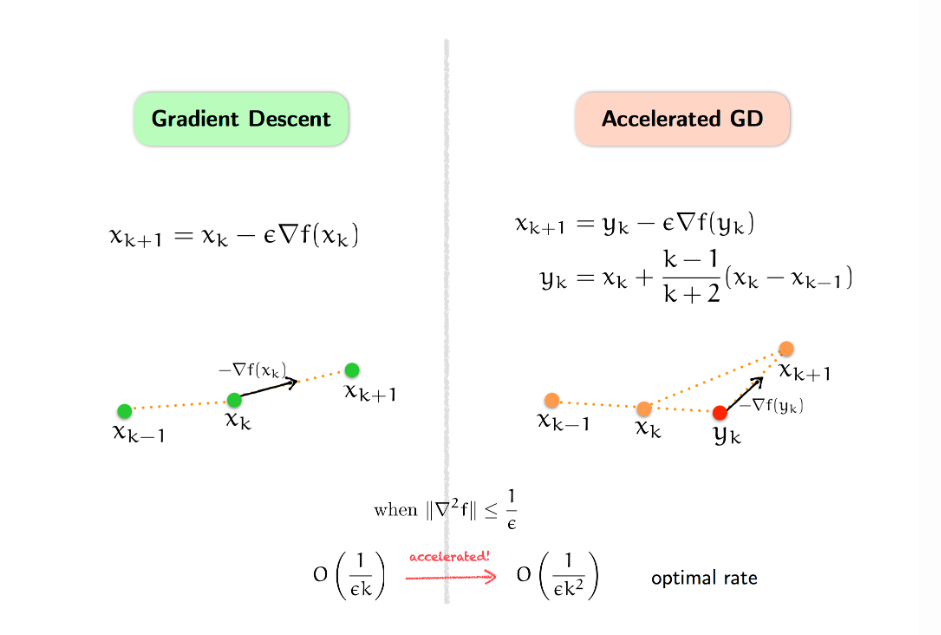

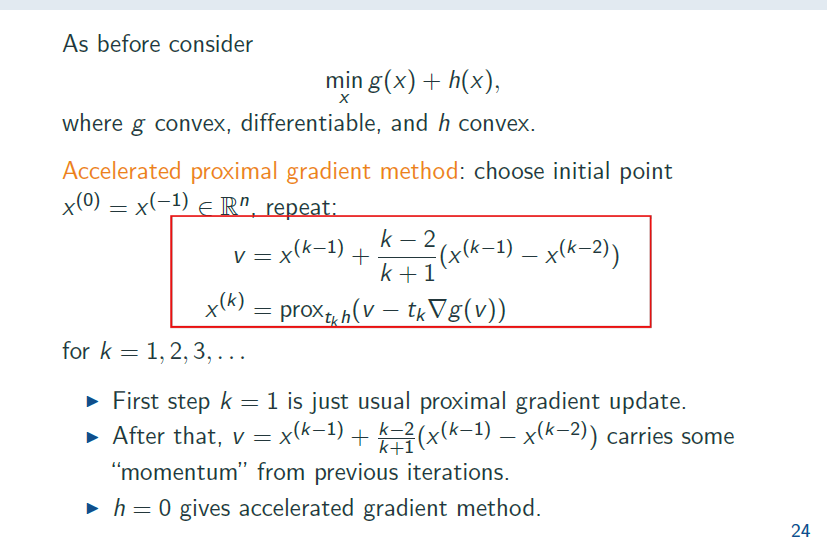

**3.   Newton:**

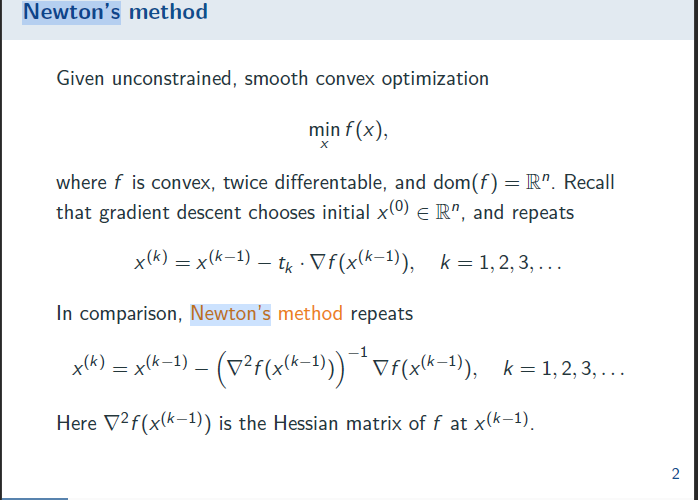

$$p_k = - \nabla^2 \mathcal{L}(\theta_k)^{-1} \mathcal{L}(\theta_k)$$

$$\theta_{k+1 \, (n+1 \, \times \, 1)} = \theta_k + \alpha p_k,   \, \alpha = 1 $$

####Độ dài bước theo backtracking

Phương pháp backtracking tìm độ dài thoả mãn điều kiện Wolfe thứ nhất theo một cách thích hợp.

> Chọn $\bar{\alpha} > 0, \rho \in (0,1), c \in (0,1) $

> Lấy $\alpha := \bar{\alpha}$

> **while** $\mathcal{L}(\theta_k + \alpha_k p_k) >  \mathcal{L}(\theta_k) + c \alpha \nabla \mathcal{L}(\theta_k)^T \rho_k$ **do**

> $\hspace{3 cm}\alpha := \rho \alpha $



> **end while**

>$\alpha_k := \alpha $

Như vậy: Sau một số bước thì $\alpha$ sẽ đủ nhỏ để thỏa mãn điều kiện

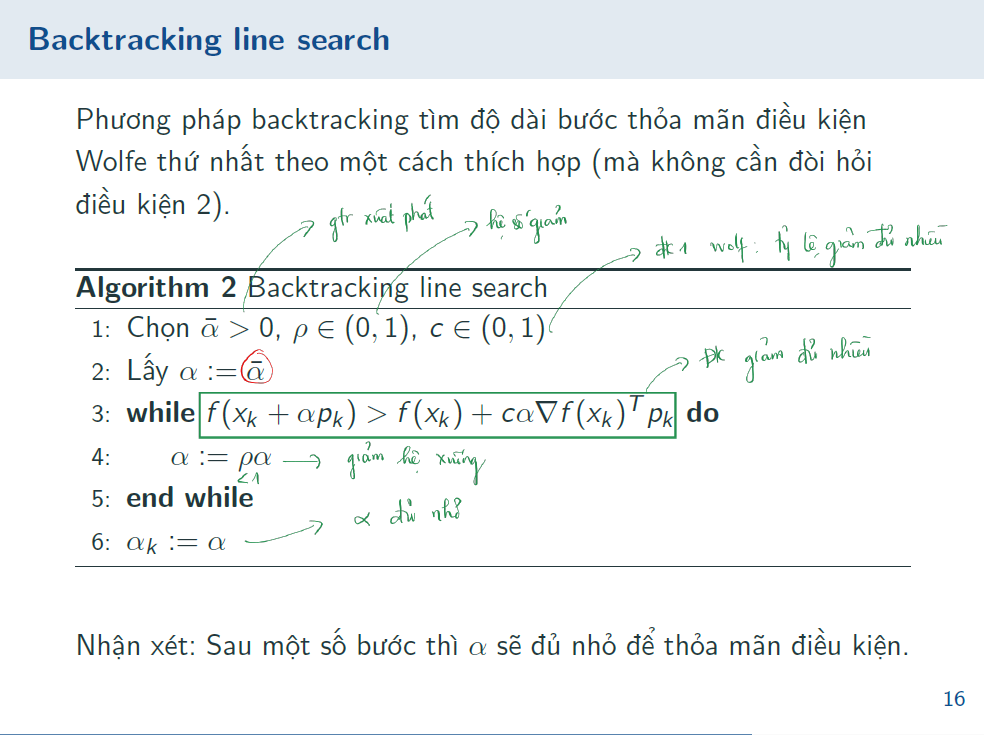

Chọn hướng giảm:


**1.   Gradient Descent:**

$$p_k = - \nabla \mathcal{L}(\theta_k) = -\frac{1}{m}.X^T. (X\theta - Y)$$


$$\bar{\alpha} >0 ,\,
\rho \in (0, 1) ,\,
c \in \left(0, \frac{1}{2}\right]$$


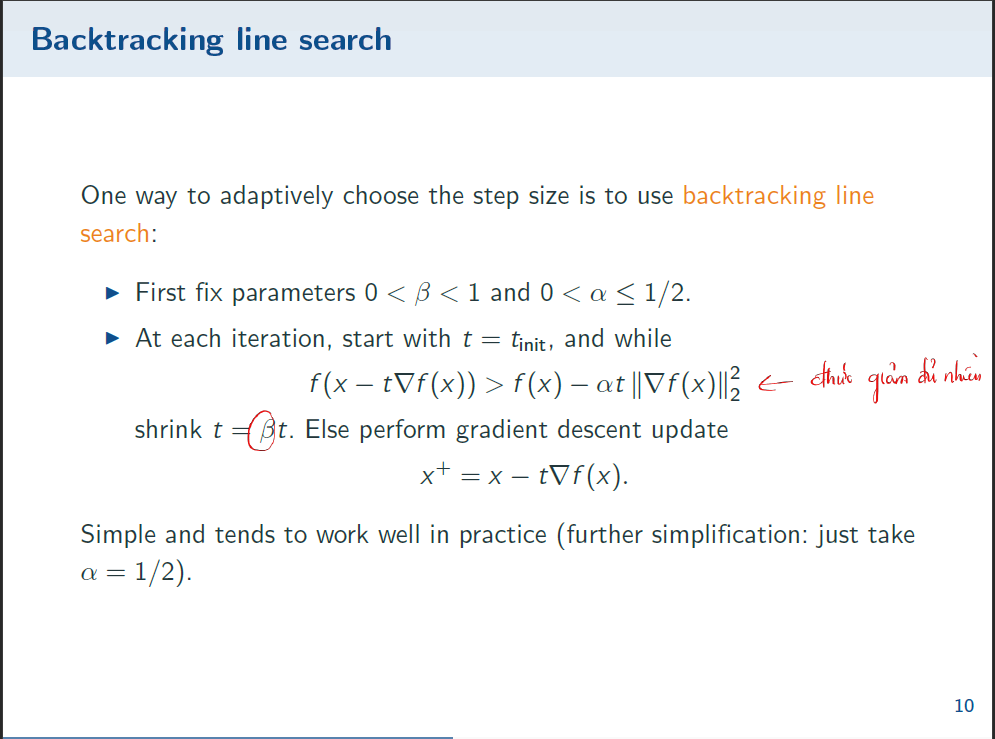

**2.   Accelerated Gradient Descent:**

> Chọn $$\bar{\alpha} =1 , \
\rho \in \left( 0, 1 \right) \$$


> Tại bước thứ k

> $\alpha = \alpha_{k-1}$

> $ v = \theta_{k-1} + \frac{k-2}{k+1}(\theta_{k-1} - \theta_{k-2}) $

> **while** $\mathcal{L}(\theta_{k+1}) >  \mathcal{L}(v) +  \nabla \mathcal{L}(v)^T (\theta_{k+1} - v) + \frac{1}{2 \alpha} (\theta_{k+1} - v)^T(\theta_{k+1} - v)$ **do**

> $\hspace{3 cm}\alpha := \rho \alpha $

> $\hspace{3 cm} \theta_{k+1} = v - \alpha \nabla \mathcal{L}(v) $


> **end while**

>$\alpha_k := \alpha $

Như vậy: Sau một số bước thì $\alpha$ sẽ đủ nhỏ để thỏa mãn điều kiện

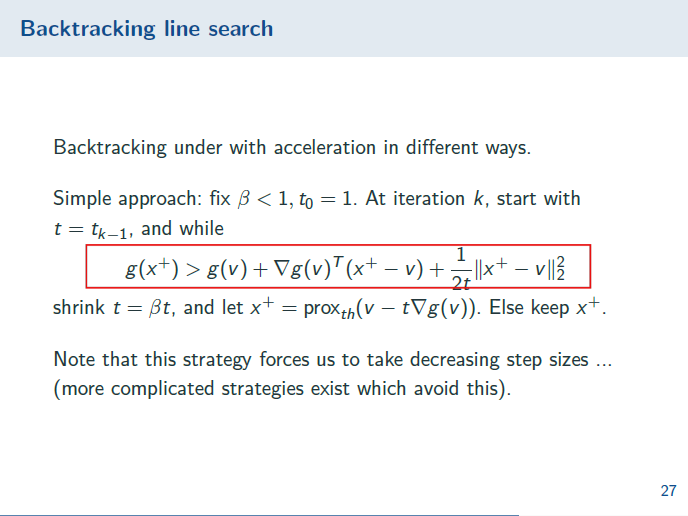

**3.   Newton:**
$$p_k = - \nabla^2 \mathcal{L}(\theta_k)^{-1} \mathcal{L}(\theta_k)$$

$$\bar{\alpha} =1 ,\,
\rho \in \left[ 0, \frac{1}{2} \right], \,
c \in (0, 1)$$




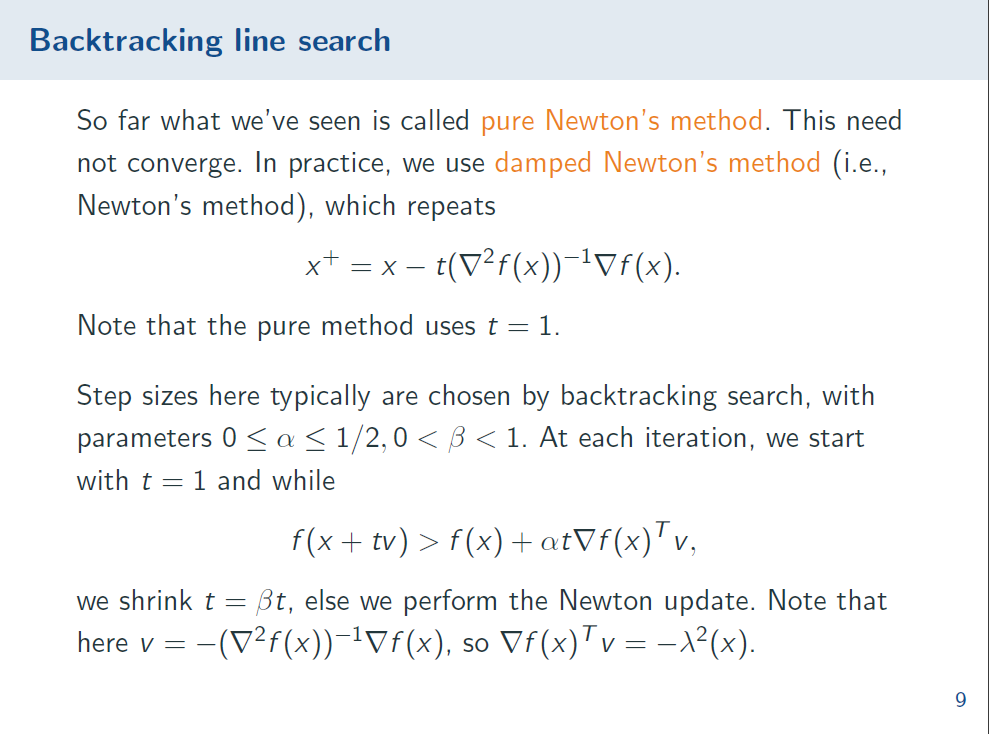

## **2. Lập trình thử nghiệp thuật toán tối ưu hóa**##

###**2.1. Gradient Descent**##

In [ ]:
def display(*matrices):
    num_matrices = len(matrices)
    num_rows, num_cols = matrices[0][0].shape

    # Tạo ma trận tổng hợp để chứa các ma trận đầu vào
    composite_matrix = np.zeros((num_rows, num_cols*num_matrices))

    # Đặt các ma trận đầu vào vào ma trận tổng hợp
    for i, matrix_list in enumerate(matrices):
        for j, matrix in enumerate(matrix_list):
            composite_matrix[:, i*num_cols+j:i*num_cols+j+1] = matrix

    # Hiển thị ma trận tổng hợp
    for row in composite_matrix:
        print('\t'.join(str(element) for element in row))

In [ ]:
# Thêm cột 1 vào ma trận X
def add_intercept_ones(X):
    intercept_ones = np.ones((len(X),1)) # array( [ [1],..,[1] ] )
    X_o = np.c_[intercept_ones,X] # Nối ma trận
    return X_o

In [ ]:
# Giá trị dự đoán
def y_pred(X, theta):
    return X @ theta

In [ ]:
# Hàm mất mát
def loss(y, y_predicted):
    m = y.size
    error =  y_predicted - y
    loss = 1/(2*m) * (error.T @ error)
    return loss

####Độ dài bước cố định

In [ ]:
# Hàm Gradient Descent với độ dài bước cố định
def gradient_descent_fixed_step(X, y, m, theta, number_of_iterations, alpha):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e20)   # Thêm một giá trị lớn vào danh sách cost

    for i in range(number_of_iterations):
        # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        error = y_predicted - y
        cost = loss(y, y_predicted)
        cost_hist.append(cost)   # cost_hist


        # Tối ưu hóa
        gradient = 1/m * (X.T @ error)
        pk = - gradient
        theta = theta + alpha * pk
        theta_hist.append(theta) # theta

        # if cost_hist[i] - cost_hist[i + 1] < 1e-20:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist

In [ ]:
# Kiểm thử Hàm

m = y_test.size  # Số lượng mẫu
theta = np.random.rand(10)
number_of_iterations = 500

#Test 1
dsfs_alpha1 = 1e-1  # learning rate

# Test 2
dsfs_alpha2 = 1e-2  # learning rate
# Test 3
dsfs_alpha3 = 1e-3  # learning rate


dsfs_prediction_hist1, dsfs_cost_hist1, dsfs_theta_hist1 = gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, dsfs_alpha1)
dsfs_prediction_hist2, dsfs_cost_hist2, dsfs_theta_hist2 = gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, dsfs_alpha2)
dsfs_prediction_hist3, dsfs_cost_hist3, dsfs_theta_hist3 = gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, dsfs_alpha3)

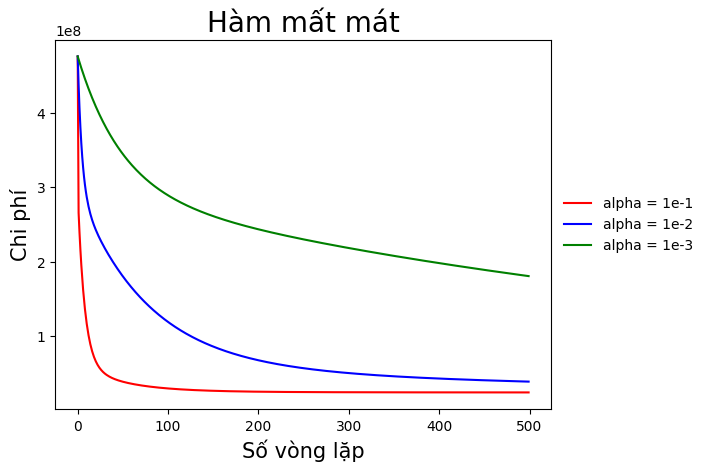

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(dsfs_cost_hist1, color='red', label='alpha = 1e-1')
plt.plot(dsfs_cost_hist2, color='blue', label='alpha = 1e-2')
plt.plot(dsfs_cost_hist3, color='green', label='alpha = 1e-3')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

####Độ dài bước theo backtracking

In [ ]:
# Hàm backtracking
def backtracking(y, X , theta, gradient, pk, alpha, p, c):
    a = alpha
    while loss(y, X @ (theta +  a * pk))  > loss(y, X @ theta ) + c * a * gradient.T @ pk:
        a *= p
    return a

In [ ]:
# Hàm Gradient Descent với độ dài bước theo backtracking
def gradient_descent_backtracking(X, y, m, theta, number_of_iterations, alpha, p, c):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e20)   # Thêm một giá trị lớn vào danh sách cost

    for i in range(number_of_iterations):
        # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        error = y_predicted - y
        cost = loss(y, y_predicted)
        cost_hist.append(cost) # cost_hist

        # Tối ưu hóa
        gradient = 1/m * (X.T @ error)
        pk = - gradient
        alpha = backtracking(y, X , theta, gradient, pk, alpha, p, c)
        theta = theta + alpha * pk
        theta_hist.append(theta) # theta

        # if cost_hist[i] - cost_hist[i + 1] < 1e-20:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist

In [ ]:
# Kiểm thử Hàm
  # a>0, p ∈ (0,0.5]

#Test 1
dsbk_alpha1 = 1e-1  # learning rate
dsbk_p1 = 0.9
dsbk_c1 = 0.5

# Test 2
dsbk_alpha2 = 1e-1  # learning rate
dsbk_p2 = 0.5
dsbk_c2 = 0.5

# Test 3
dsbk_alpha3 = 1e-1  # learning rate
dsbk_p3 = 0.2
dsbk_c3 = 0.5

dsbk_prediction_hist1, dsbk_cost_hist1, dsbk_theta_hist1 = gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, dsbk_alpha1, dsbk_p1, dsbk_c1)
dsbk_prediction_hist2, dsbk_cost_hist2, dsbk_theta_hist2 = gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, dsbk_alpha2, dsbk_p2, dsbk_c2)
dsbk_prediction_hist3, dsbk_cost_hist3, dsbk_theta_hist3 = gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, dsbk_alpha3, dsbk_p3, dsbk_c3)

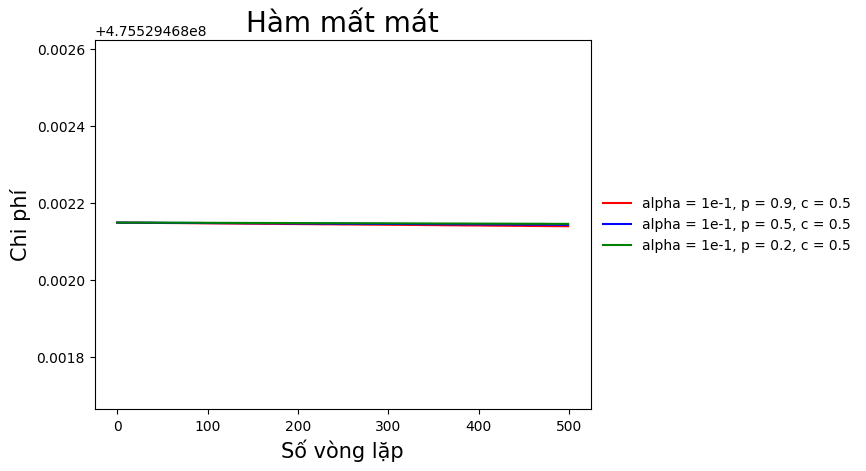

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(dsbk_cost_hist1, color='red', label='alpha = 1e-1, p = 0.9, c = 0.5')
plt.plot(dsbk_cost_hist2, color='blue', label='alpha = 1e-1, p = 0.5, c = 0.5')
plt.plot(dsbk_cost_hist3, color='green', label='alpha = 1e-1, p = 0.2, c = 0.5')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

### **2.2. Accelerated Gradient Descent**


####Độ dài bước cố định

In [ ]:
# Hàm Accelerated Gradient Descent với độ dài bước cố định
def accelerated_gradient_descent_fixed_step(X, y, m, theta, number_of_iterations, alpha):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e20)   # Thêm một giá trị lớn vào danh sách cost

    k=1
    theta_k  = theta
    theta_k_1  = theta
    theta_k_2  = theta
    for i in range(number_of_iterations):

       # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta_k)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        cost = loss(y, y_predicted)
        cost_hist.append(cost)   # cost_hist


        # Tối ưu hóa
        momentum = (k - 2) / (k + 1) if k > 2 else 0
        v = theta_k_1 + momentum * (theta_k_1 - theta_k_2)
        gradient = 1/m * (X.T @ (X @ v - y))
        pk = - gradient
        theta_k = v + alpha * pk
        theta_hist.append(theta_k) # theta

        theta_k_2 = theta_k_1
        theta_k_1 = theta_k
        k += 1

        # if cost_hist[i] - cost_hist[i + 1] < 1e-20:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist

In [ ]:
# Kiểm thử Hàm

#Test 1
agfs_alpha1 = 1e-1  # learning rate

# Test 2
agfs_alpha2 = 1e-2  # learning rate
# Test 3
agfs_alpha3 = 1e-3  # learning rate


agfs_prediction_hist1, agfs_cost_hist1, agfs_theta_hist1 = accelerated_gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, agfs_alpha1)
agfs_prediction_hist2, agfs_cost_hist2, agfs_theta_hist2 = accelerated_gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, agfs_alpha2)
agfs_prediction_hist3, agfs_cost_hist3, agfs_theta_hist3 = accelerated_gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, agfs_alpha3)

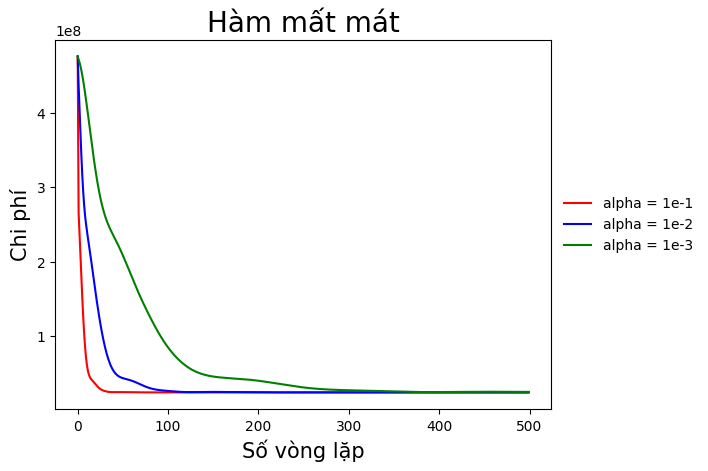

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(agfs_cost_hist1, color='red', label='alpha = 1e-1')
plt.plot(agfs_cost_hist2, color='blue', label='alpha = 1e-2')
plt.plot(agfs_cost_hist3, color='green', label='alpha = 1e-3')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

####Độ dài bước theo backtracking

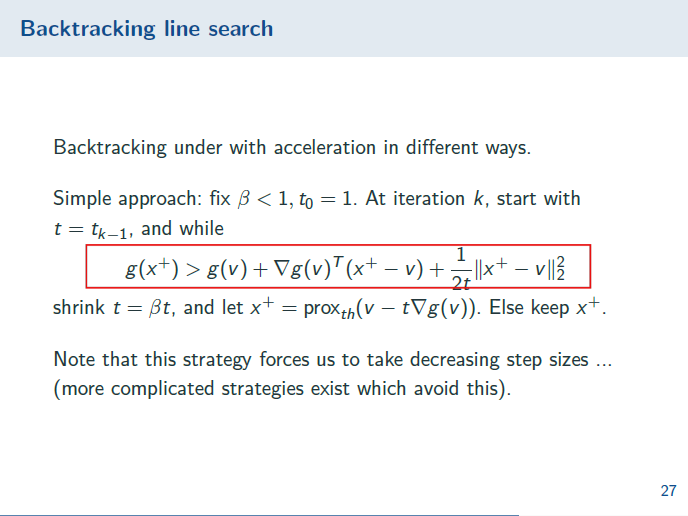

> Chọn $$\bar{\alpha} =1 , \
\rho \in \left( 0, 1 \right) \$$


> Tại bước thứ k

> $\alpha = \alpha_{k-1}$

> $ v = \theta_{k-1} + \frac{k-2}{k+1}(\theta_{k-1} - \theta_{k-2}) $

> **while** $\mathcal{L}(\theta_{k+1}) >  \mathcal{L}(v) +  \nabla \mathcal{L}(v)^T (\theta_{k+1} - v) + \frac{1}{2 \alpha} (\theta_{k+1} - v)^T(\theta_{k+1} - v)$ **do**

> $\hspace{3 cm}\alpha := \rho \alpha $

> $\hspace{3 cm} \theta_{k+1} = v - \alpha \nabla \mathcal{L}(v) $


> **end while**

>$\alpha_k := \alpha $

Như vậy: Sau một số bước thì $\alpha$ sẽ đủ nhỏ để thỏa mãn điều kiện

In [ ]:
# Hàm Accelerated Gradient Descent với độ dài bước backtracking
def accelerated_gradient_descent_backtracking(X, y, m, theta, number_of_iterations, alpha, p):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e20)   # Thêm một giá trị lớn vào danh sách cost

    k=1
    theta_k  = theta
    theta_k_1  = theta
    theta_k_2  = theta

    alpha_hist = []
    alpha_hist.append(alpha)
    for i in range(number_of_iterations):

       # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta_k)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        cost = loss(y, y_predicted)
        cost_hist.append(cost)   # cost_hist

        # Tối ưu hóa
        momentum = (k - 2) / (k + 1) if k > 2 else 0
        v = theta_k_1 + momentum * (theta_k_1 - theta_k_2)
        gradient = 1/m * (X.T @ (X @ v - y))

        while loss(y, X @ theta_k)  > loss(y, X @ v)  + gradient.T @ (theta_k  - v) + 1/(2*alpha) * (theta_k - v).T @ (theta_k - v):
           alpha *= p
           alpha_hist.append(alpha)

        theta_k = v - alpha * gradient
        theta_hist.append(theta_k) # theta

        theta_k_2 = theta_k_1
        theta_k_1 = theta_k
        k += 1

        # if cost_hist[i] - cost_hist[i + 1] < 1e-10:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist, alpha_hist

In [ ]:
# Kiểm thử Hàm
  # a=1, p ∈(0,1)
agbk_alpha = 1

#Test 1
agbk_p1 = 0.9

# Test 2
agbk_p2 = 0.5

# Test 3
agbk_p3 = 0.1

agbk_prediction_hist1, agbk_cost_hist1, agbk_theta_hist1, agbk_alpha_hist1 = accelerated_gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, agbk_alpha, agbk_p1)
agbk_prediction_hist2, agbk_cost_hist2, agbk_theta_hist2, agbk_alpha_hist2  = accelerated_gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, agbk_alpha, agbk_p2)
agbk_prediction_hist3, agbk_cost_hist3, agbk_theta_hist3, agbk_alpha_hist3  = accelerated_gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, agbk_alpha, agbk_p3)

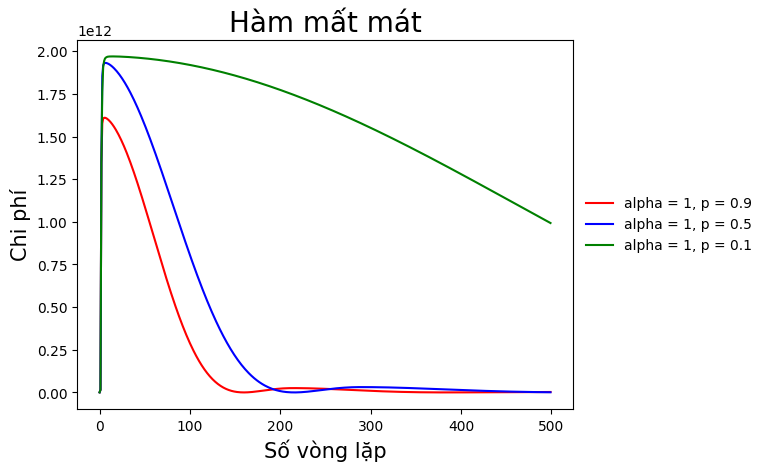

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(agbk_cost_hist1, color='red', label='alpha = 1, p = 0.9')
plt.plot(agbk_cost_hist2, color='blue', label='alpha = 1, p = 0.5')
plt.plot(agbk_cost_hist3, color='green', label='alpha = 1, p = 0.1')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

In [ ]:
# Kiểm thử Hàm
  # a=1, p ∈(0,1)
agbk_alpha1 = 0.1

#Test 1
agbk_p1 = 0.9

# Test 2
agbk_p2 = 0.5

# Test 3
agbk_p3 = 0.1

agbk_prediction_hist1, agbk_cost_hist1, agbk_theta_hist1, agbk_alpha_hist1 = accelerated_gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, agbk_alpha1, agbk_p1)
agbk_prediction_hist2, agbk_cost_hist2, agbk_theta_hist2, agbk_alpha_hist2  = accelerated_gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, agbk_alpha1, agbk_p2)
agbk_prediction_hist3, agbk_cost_hist3, agbk_theta_hist3, agbk_alpha_hist3  = accelerated_gradient_descent_backtracking(X_train, y_train, m, theta, number_of_iterations, agbk_alpha1, agbk_p3)

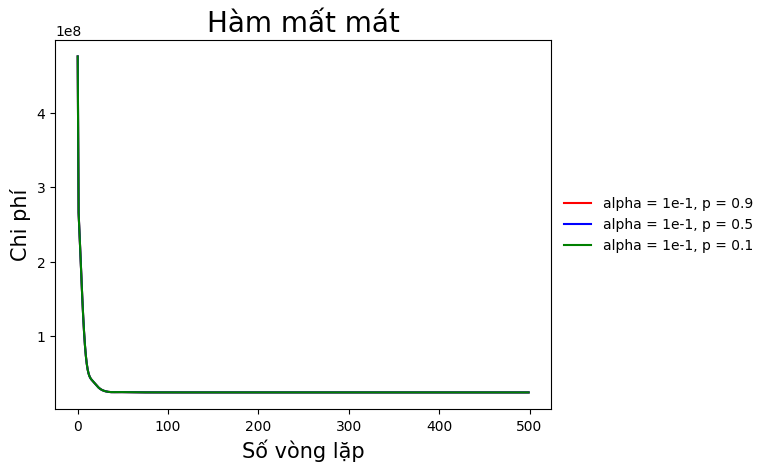

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(agbk_cost_hist1, color='red', label='alpha = 1e-1, p = 0.9')
plt.plot(agbk_cost_hist2, color='blue', label='alpha = 1e-1, p = 0.5')
plt.plot(agbk_cost_hist3, color='green', label='alpha = 1e-1, p = 0.1')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

In [ ]:
# Hàm Accelerated Gradient Descent với độ dài bước backtracking
def accelerated_gradient_descent_backtracking(X, y, m, theta, number_of_iterations, alpha, p):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e10)   # Thêm một giá trị lớn vào danh sách cost

    k=1
    theta_k  = theta
    theta_k_1  = theta
    theta_k_2  = theta

    alpha_hist = []
    alpha_hist.append(alpha)
    for i in range(number_of_iterations):

       # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta_k)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        cost = loss(y, y_predicted)
        cost_hist.append(cost)   # cost_hist

        # Tối ưu hóa
        momentum = (k - 2) / (k + 1) if k > 2 else 0
        v = theta_k_1 + momentum * (theta_k_1 - theta_k_2)
        gradient = 1/m * (X.T @ (X @ v - y))

        while loss(y, X @ theta_k)  > loss(y, X @ v)  + gradient.T @ (theta_k  - v) + 1/(2*alpha) * (theta_k - v).T @ (theta_k - v):
           alpha *= p
           alpha_hist.append(alpha)

        theta_k = v - alpha * gradient
        theta_hist.append(theta_k) # theta

        theta_k_2 = theta_k_1
        theta_k_1 = theta_k
        k += 1

        # if cost_hist[i] - cost_hist[i + 1] < 1e-10:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist, alpha_hist

### **2.3. Newton**

####Độ dài bước cố định

In [ ]:
# Hàm Newton với độ dài bước cố định
def newton_fixed_step(X, y, m, theta, number_of_iterations, alpha):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e20)   # Thêm một giá trị lớn vào danh sách cost

    for i in range(number_of_iterations):
        # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        error = y_predicted - y
        cost = loss(y, y_predicted)
        cost_hist.append(cost)   # cost_hist

        # Tối ưu hóa
        gradient = 1/m * (X.T @ error)
        hessian = 1/m * (X.T @ X)
        pk = - np.linalg.inv(hessian) @ gradient
        theta = theta + alpha * pk
        theta_hist.append(theta) # theta
        # if cost_hist[i] - cost_hist[i + 1] < 1e-10:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist

In [ ]:
# Kiểm thử Hàm

#Test 1
nwfs_alpha = 1  # learning rate

nwfs_prediction_hist1, nwfs_cost_hist1, nwfs_theta_hist1 = newton_fixed_step(X_train, y_train, m, theta, number_of_iterations, nwfs_alpha)

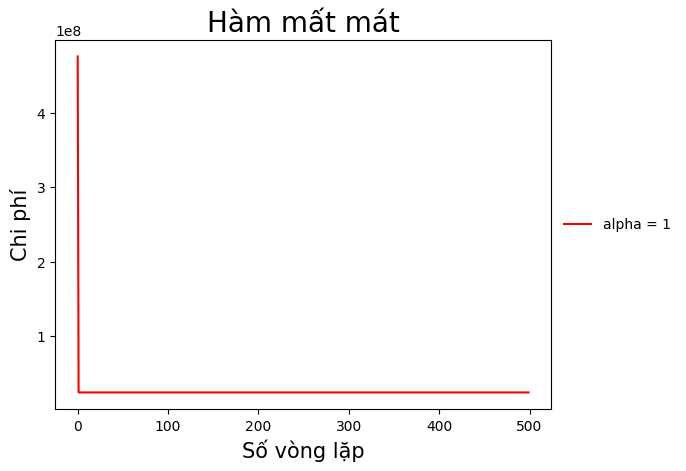

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(nwfs_cost_hist1, color='red', label='alpha = 1')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

####Độ dài bước theo backtracking

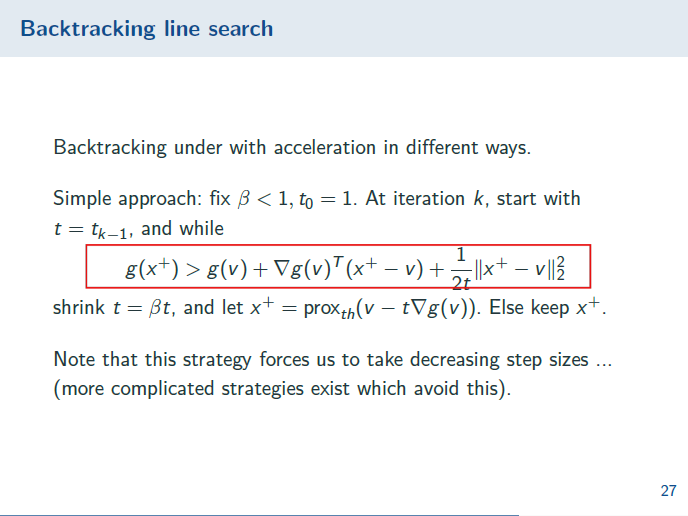

In [ ]:
# Hàm Newton với độ dài bước cố định
def newton_backtracking(X, y, m, theta, number_of_iterations, alpha, p, c):
    X = add_intercept_ones(X)
    cost_hist = []
    theta_hist = []
    prediction_hist = []
    # run = True
    cost_hist.append(1e20)   # Thêm một giá trị lớn vào danh sách cost

    for i in range(number_of_iterations):
        # Tính giá trị dự đoán và hàm mất mát
        y_predicted = y_pred(X, theta)   # Dự đoán y = theta_0*x0+theta_1*x1...
        prediction_hist.append(y_predicted)   # prediction_hist
        error = y_predicted - y
        cost = loss(y, y_predicted)
        cost_hist.append(cost)   # cost_hist

        # Tối ưu hóa
        gradient = 1/m * (X.T @ error)
        hessian = 1/m * (X.T @ X)
        pk = - np.linalg.inv(hessian) @ gradient
        alpha = backtracking(y, X , theta, gradient, pk, alpha, p, c)
        theta = theta + alpha * pk
        theta_hist.append(theta) # theta
        # if cost_hist[i] - cost_hist[i + 1] < 1e-10:   # kiểm tra xem sự thay đổi trong hàm cost có nhỏ hơn 10^(-10) không
        #     run = False
        #     break

    cost_hist.pop(0)   # Loại bỏ giá trị lớn đã thêm ở đầu danh sách
    return prediction_hist, cost_hist, theta_hist

In [ ]:
# Kiểm thử Hàm
  # a =1, ρ∈[0,0.5], c∈(0,1)

nwbk_alpha = 1  # learning rate

#Test 1
nwbk_p1 = 0.1
nwbk_c1 = 0.1

# Test 2
nwbk_p2 = 0.2
nwbk_c2 = 0.5

# Test 3
nwbk_p3 = 0.5
nwbk_c3 = 0.9

nwbk_prediction_hist1, nwbk_cost_hist1, nwbk_theta_hist1 = newton_backtracking(X_train, y_train, m, theta, number_of_iterations, nwbk_alpha, nwbk_p1, nwbk_c1)
nwbk_prediction_hist2, nwbk_cost_hist2, nwbk_theta_hist2 = newton_backtracking(X_train, y_train, m, theta, number_of_iterations, nwbk_alpha, nwbk_p2, nwbk_c2)
nwbk_prediction_hist3, nwbk_cost_hist3, nwbk_theta_hist3 = newton_backtracking(X_train, y_train, m, theta, number_of_iterations, nwbk_alpha, nwbk_p3, nwbk_c3)

In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(nwbk_cost_hist1, color='red', label='alpha = 1, p = 0.1, c = 0.1')
plt.plot(nwbk_cost_hist2, color='blue', label='alpha = 1, p = 0.2, c = 0.5')
plt.plot(nwbk_cost_hist3, color='green', label='alpha = 1, p = 0.5, c = 0.9')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

### **2.4. Scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fit model hồi quy
lm = lm.fit(X_train,y_train)

pred = lm.predict(X_train)

# theta
print('Intercept : {}'.format(round(lm.intercept_,3)))
print('Theta : {}'.format(lm.coef_))


Intercept : 50541.859
Theta : [  4754.98342094    518.48500204    167.72150461  -6570.06811922
    936.46055584    603.65369442 -44551.95174442   4576.71313129
  -6315.10043938]


In [ ]:
# Plot hàm mất mát

plt.title('Hàm mất mát', size=20)
plt.xlabel('Số vòng lặp', size=15)
plt.ylabel('Chi phí', size=15)

plt.plot(dsbk_cost_hist1, color='red', label='alpha = 1e-1, p = 0.9, c = 0.5')
plt.plot(dsbk_cost_hist2, color='blue', label='alpha = 1e-1, p = 0.5, c = 0.5')
plt.plot(dsbk_cost_hist3, color='green', label='alpha = 1e-1, p = 0.2, c = 0.5')

legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(theta)
ax.set_xlabel('Index of theta')
ax.set_ylabel('Value of theta')
ax.set_title('Values of theta')
plt.show()

In [ ]:
#list theta theo gradient descent
theta_gd = dsfs_theta_hist1[-1]
print('Intercept : {}'.format(round(theta_gd[0],3)))
print('Theta : {}'.format(theta_gd[1:]))

Intercept : 49424.255
Theta : [  4920.77173355    648.01724726    189.08882573  -6067.50633639
   1039.9245302     754.72380564 -44400.04331541   6648.43991241
  -6086.35857083]


In [ ]:
#list theta theo accelerated gradient descent
theta_ag = agfs_theta_hist1[-1]
print('Intercept : {}'.format(round(theta_ag[0],3)))
print('Theta : {}'.format(theta_ag[1:]))

Intercept : 50536.195
Theta : [  4756.15403765    519.68128057    168.4271995   -6569.07554219
    937.46371965    604.97289987 -44551.07149863   4580.59970368
  -6313.40902675]


In [ ]:
#list theta theo newton
theta_newton = nwfs_theta_hist1[-1]
print('Intercept : {}'.format(round(theta_newton[0],3)))
print('Theta : {}'.format(theta_newton[1:]))

Intercept : 50541.859
Theta : [  4754.98342094    518.48500204    167.72150461  -6570.06811922
    936.46055584    603.65369442 -44551.95174442   4576.71313129
  -6315.10043938]


In [ ]:
#Chất lượng của mô hình
r2_skit = lm.score(X_train, y_train)
print('R square from sci-kit learn: {}'.format(r2_skit))

r2_gd = 1 - (sum((y_train -dsfs_prediction_hist1[-1])**2)) / (sum((y_train - y_train.mean())**2))
print('R square doing from gradient descent: {}'.format(r2_gd))

r2_ag = 1 - (sum((y_train -agfs_prediction_hist1[-1])**2)) / (sum((y_train - y_train.mean())**2))
print('R square doing from accelerated gradient descent: {}'.format(r2_ag))

r2_newton = 1 - (sum((y_train -nwfs_prediction_hist1[-1])**2)) / (sum((y_train - y_train.mean())**2))
print('R square doing from newton: {}'.format(r2_newton))

R square from sci-kit learn: 0.9045560130672436
R square doing from gradient descent: 0.9043924596157631
R square doing from accelerated gradient descent: 0.9045560122778272
R square doing from newton: 0.9045560130672509


## **3. So sánh**

In [ ]:
import time
#So sánh thời gian chạy
# Gradient Descent
start_time = time.time()
m = y_test.size  # Số lượng mẫu
theta = np.random.rand(10)
number_of_iterations = 500
#Test 1
dsfs_alpha1 = 1e-1  # learning rate
dsfs_prediction_hist1, dsfs_cost_hist1, dsfs_theta_hist1 = gradient_descent_fixed_step(X_train, y_train, m, theta, number_of_iterations, dsfs_alpha1)
end_time = time.time()
print("Thời gian chạy Gradient Descent:", end_time - start_time, "giây")


In [ ]:
# Gradient Descent của Sklearn
lm = LinearRegression()
start_time = time.time()
lm = lm.fit(X_train,y_train)
end_time = time.time()
print("Thời gian chạy Gradient Descent của Sklearn:", end_time - start_time, "giây")

# **III. Kết luận**